## 8.1. Movie Sentiment Analysis

### 8.1.1. Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 8.1.2. Importing the Dataset

In [2]:
data_path = "E:/Datasets/imdb_reviews.csv"
movie_dataset = pd.read_csv(data_path, engine='python')
movie_dataset.head()

,SentimentText,Sentiment
0,"first think another Disney movie, might good, ...",1
1,"Put aside Dr. House repeat missed, Desperate H...",0
2,"big fan Stephen King's work, film made even gr...",1
3,watched horrid thing TV. Needless say one movi...,0
4,truly enjoyed film. acting terrific plot. Jeff...,1


In [3]:
movie_dataset.shape

(25000, 2)

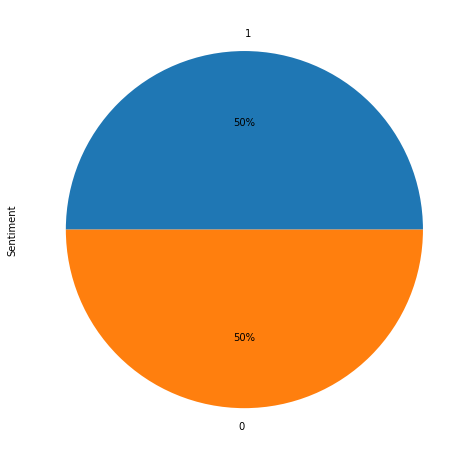

In [4]:
plt.rcParams["figure.figsize"] = [8,10] 
movie_dataset.Sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%')

### 8.1.3. Cleaning the Data

In [5]:
X = movie_dataset["SentimentText"]

y = movie_dataset["Sentiment"]


In [6]:
def clean_text(doc):


    document = re.sub('[^a-zA-Z]', ' ', doc)

    document = re.sub(r"\s+[a-zA-Z]\s+", ' ', document)

    document = re.sub(r'\s+', ' ', document)

    return document


In [7]:
X_sentences = []
reviews = list(X)
for rev in reviews:
    X_sentences.append(clean_text(rev))

### 8.1.4. Converting Text to Numbers

In [8]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2000, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X= vectorizer.fit_transform(X_sentences).toarray()

### 8.1.5. Training the Model

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [10]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=250, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

### 8.1.6. Evaluating Model Performance

In [11]:
y_pred = clf.predict(X_test)

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[2078  405]
 [ 420 2097]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.83      2483
           1       0.84      0.83      0.84      2517

    accuracy                           0.83      5000
   macro avg       0.83      0.84      0.83      5000
weighted avg       0.84      0.83      0.84      5000

0.835


### 8.1.7 Making Prediction on Single Instance

In [13]:
print(clf.predict(vectorizer.transform(["The movie was really good, I liked it"])))

[1]


In [14]:
print(clf.predict(vectorizer.transform(["It was an awful movie, waste of time and money"])))

[0]
